In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(os.path.join(os.getcwd(), "data", "filtered", "Eye22.csv"))

In [5]:
df.loc[:, ["TimeStamp", "Page",""]]

,TimeStamp,Page
0,2.027903,1
1,2.088315,1
2,2.772605,1
3,2.778582,1
4,2.784600,1
...,...,...
10375,117.767100,89
10376,117.773100,89
10377,117.779100,89
10378,117.785100,89


In [4]:
df.columns

Index(['TimeStamp', 'IsAnnotation', 'Page', 'Panel', 'LeftDiameter',
       'LeftDisplaceNormalizedX', 'LeftDisplaceNormalizedY', 'LeftOriginPosX',
       'LeftOriginPosY', 'LeftOriginPosZ', 'LeftOpenness',
       'LeftGazeDirectionX', 'LeftGazeDirectionY', 'LeftGazeDirectionZ',
       'RightDiameter', 'RightDisplaceNormalizedX', 'RightDisplaceNormalizedY',
       'RightOriginPosX', 'RightOriginPosY', 'RightOriginPosZ',
       'RightOpenness', 'RightGazeDirectionX', 'RightGazeDirectionY',
       'RightGazeDirectionZ', 'HeadPosX', 'HeadPosY', 'HeadPosZ',
       'HeadRotationX', 'HeadRotationY', 'HeadRotationZ', 'HeadRotationW',
       'GazePointX', 'GazePointY', 'GazePointZ', 'GazePointWorldX',
       'GazePointWorldY', 'GazePointWorldZ', 'IntersectionPosX',
       'IntersectionPosY', 'IntersectionPosZ', 'IntersectionDist',
       'GazePointDist', 'Saccade', 'Fixation', 'Jaw_Right', 'Jaw_Left',
       'Jaw_Forward', 'Jaw_Open', 'Mouth_Ape_Shape', 'Mouth_Upper_Right',
       'Mouth_Upper

In [5]:
df.info

<bound method DataFrame.info of         TimeStamp  IsAnnotation  Page  Panel  LeftDiameter  \
0        2.027903         False     1     -1            -1   
1        2.088315         False     1     -1            -1   
2        2.772605         False     1     -1            -1   
3        2.778582         False     1     -1            -1   
4        2.784600         False     1     -1            -1   
...           ...           ...   ...    ...           ...   
10375  117.767100         False    89     -1            -1   
10376  117.773100         False    89     -1            -1   
10377  117.779100         False    89     -1            -1   
10378  117.785100         False    89     -1            -1   
10379  117.791000         False    89     -1            -1   

       LeftDisplaceNormalizedX  LeftDisplaceNormalizedY  LeftOriginPosX  \
0                           -1                       -1        32.82259   
1                           -1                       -1        32.82259  

In [6]:
df["Jaw_Open"].value_counts()

0.000000    4982
0.622195       5
0.627442       5
0.733104       4
0.746276       4
            ... 
0.708964       1
0.712272       1
0.720714       1
0.729514       1
0.669922       1
Name: Jaw_Open, Length: 3218, dtype: int64

<AxesSubplot:>

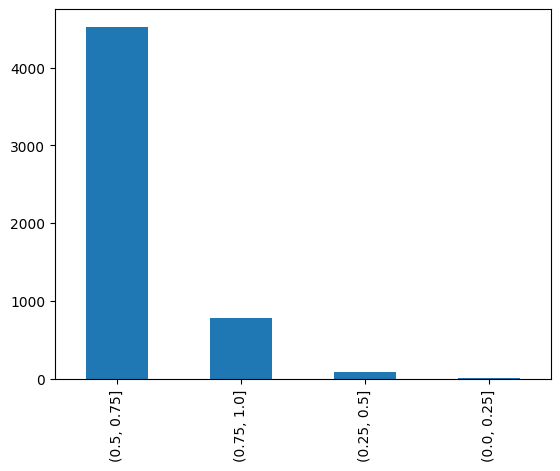

In [7]:
pd.cut(df["Jaw_Open"], bins=[0, 0.25, 0.5, 0.75, 1.0]).value_counts().plot(kind="bar")

<AxesSubplot:>

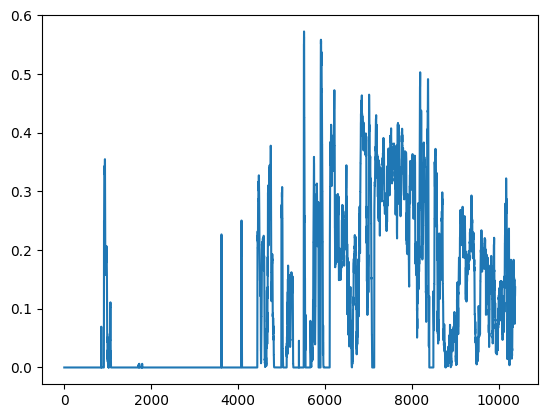

In [22]:
df['Mouth_Smile_Left'].plot()

In [9]:
df["3Mean"]

0       -1.0
1       -1.0
2       -1.0
3       -1.0
4       -1.0
        ... 
10375   -1.0
10376   -1.0
10377   -1.0
10378   -1.0
10379   -1.0
Name: 3Mean, Length: 10380, dtype: float64

In [10]:
df['BothAverage'] = (df['LeftDiameter'] + df['RightDiameter']) /2

In [11]:
df["BothAverage"]

0       -1.0
1       -1.0
2       -1.0
3       -1.0
4       -1.0
        ... 
10375   -1.0
10376   -1.0
10377   -1.0
10378   -1.0
10379   -1.0
Name: BothAverage, Length: 10380, dtype: float64

In [12]:
df['3Mean'] = df['BothAverage'].rolling(3,min_periods = 1, center = True).mean()
# pd.rolling_mean(df["BothAverage"], 3)

In [13]:
x = np.arange(10)
np.lib.stride_tricks.sliding_window_view(x, 3).mean(axis=1)

array([1., 2., 3., 4., 5., 6., 7., 8.])

In [14]:
import numpy
def moving_average(x, w):
    import numpy
    return numpy.lib.stride_tricks.sliding_window_view(x, w).mean(axis=1)

In [18]:
from pandarallel import pandarallel
import time
pandarallel.initialize(progress_bar=True, verbose=1)

In [19]:
%time _ = df.loc[:, ["BothAverage", "GazePointX"]].parallel_apply(moving_average, args=(3,))

CPU times: total: 78.1 ms
Wall time: 1.13 s


In [20]:
def nabeatsu(x):
    return True if (x % 3 == 0) or ('3' in str(x)) else False
x = pd.Series(np.arange(1e8))
%time _ = x.parallel_apply(nabeatsu)

CPU times: total: 1.53 s
Wall time: 23.5 s
